In [34]:
from heapq import nlargest
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd


In [3]:
ebitda = pd.read_csv('/Users/admlanno/Desktop/projects/EbitdaAnalysis/data/EBITDA.csv')

In [4]:
ebitda

,Наименование,ИНН,Год,EBITDA
0,"""БАЗИС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",5263025484,2022,0.0
1,"""БАЗИС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",5263025484,2021,0.0
2,"""БАЗИС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",5263025484,2019,4859.0
3,"""БАЗИС"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",5263025484,2020,2525.0
4,"""БЕРЕГ"" ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ",5056003490,2023,0.0
...,...,...,...,...
484967,"ФИРМА ""ЮГ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",2015000021,2021,0.0
484968,"ФИРМА ""ЮГ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",2015000021,2020,0.0
484969,"ФИРМА ""ЮГ"" (ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕН...",2015000021,2019,0.0
484970,ЮРИДИЧЕСКИЙ И ФИНАНСОВЫЙ КОНСАЛТИНГ ОБЩЕСТВО С...,7804689055,2022,0.0


In [27]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

/var/folders/vv/nt_93ffn49329l9mqpwy9z0h0000gn/T/ipykernel_4737/2539567777.py:23: RuntimeWarning: invalid value encountered in log1p
  profit_growth_log = np.log1p(profit_growth)


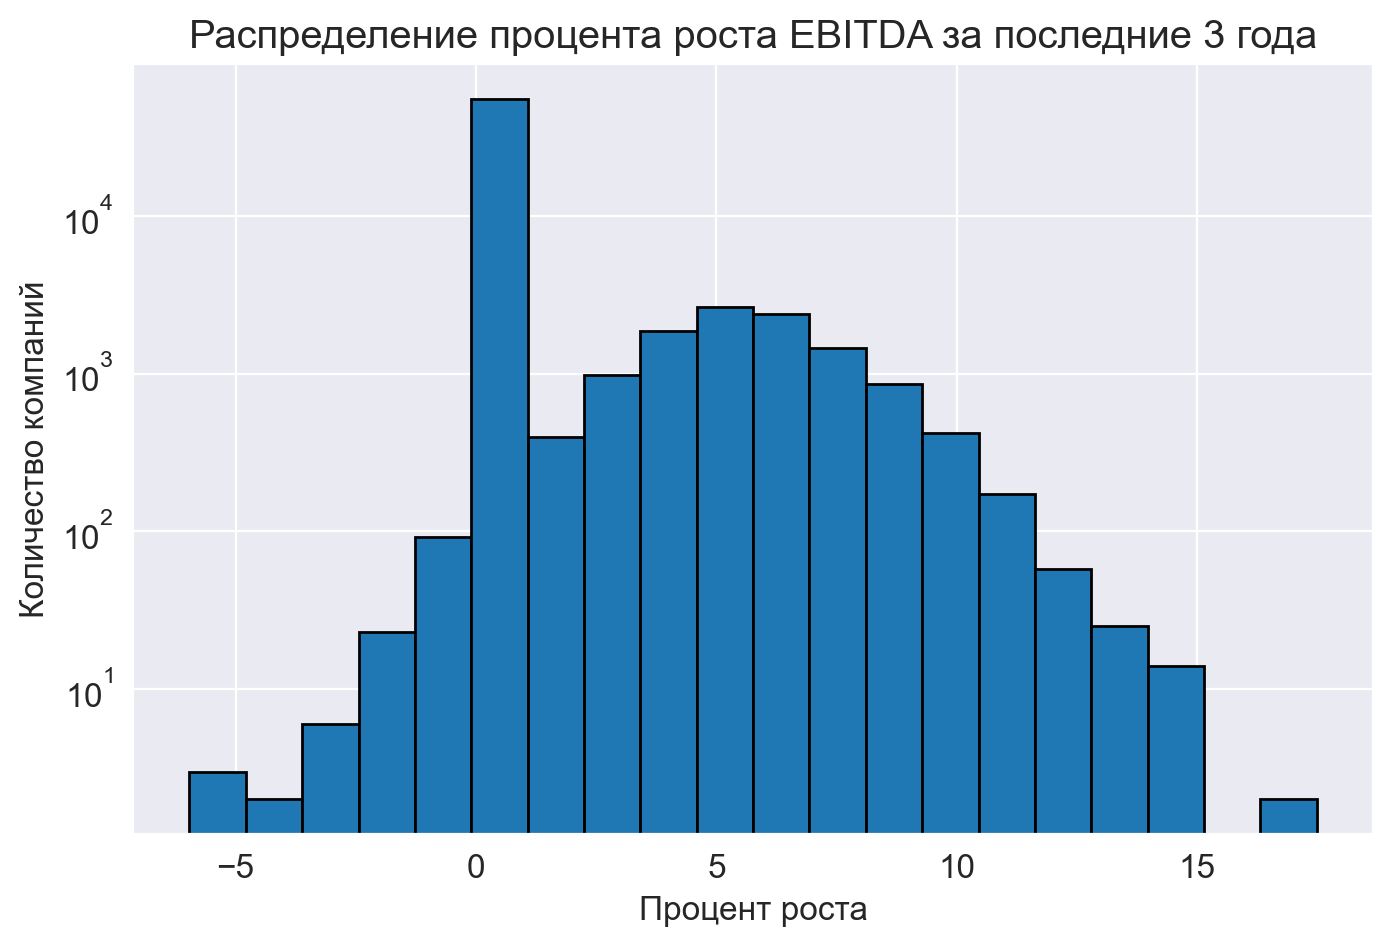

In [28]:

def calculate_profit_growth(ebitda_df, years_back=3):
    profit_growth = []

    companies = ebitda['ИНН'].unique()
    for company in companies:
        company_data = ebitda[ebitda['ИНН'] == company]
        company_data = company_data.sort_values(by='Год')

        if len(company_data) >= years_back + 1:
            profit_now = company_data.iloc[-1]['EBITDA']
            profit_before = company_data.iloc[-(years_back+1)]['EBITDA']

            if profit_before != 0:
                growth = ((profit_now - profit_before) / abs(profit_before)) * 100
                profit_growth.append(growth)
            else:
                profit_growth.append(0)

    return profit_growth


profit_growth = calculate_profit_growth(ebitda, years_back=3)
profit_growth_log = np.log1p(profit_growth)

plt.hist(profit_growth_log, bins=20, edgecolor='black')
plt.yscale('log')
plt.title('Распределение процента роста EBITDA за последние 3 года')
plt.xlabel('Процент роста')
plt.ylabel('Количество компаний')
plt.show()

График показывает распределение процента роста EBITDA за последние 3 года для компаний. На графике заметен значительный пик около нуля, что указывает на то, что большинство компаний либо не изменили свои показатели EBITDA, либо продемонстрировали незначительный рост. В то же время наблюдается равномерное распределение умеренных показателей роста EBITDA в диапазоне от 0 до 10%, что говорит о том, что значительное число компаний показывает стабильный, но не слишком высокий прирост. Кроме того, небольшая часть компаний продемонстрировала значительный рост более 10%, что характерно для высокоэффективных компаний, однако такие случаи являются редкими. Присутствие компаний с отрицательным ростом также свидетельствует о том, что для ряда компаний последние три года были сложными в плане финансовых результатов.

In [25]:
geo = pd.merge(ebitda, df[['ИНН', 'Город', 'Регион']], on='ИНН', how='left')

In [26]:
geo = geo.loc[geo.groupby('Наименование')['EBITDA'].idxmax()]


In [27]:
geo = geo.nlargest(500, 'EBITDA')

In [28]:
geo.head(10)

,Наименование,ИНН,Год,EBITDA,Город,Регион
364738,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",2722115780,2019,56176295.0,г Хабаровск,27 - Хабаровский край
74976,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВИС-...",7709033070,2023,17325706.0,NaN,77 - г.Москва
21918,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗАЛИЯ""",7704618565,2023,16833574.0,NaN,77 - г.Москва
190224,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОНО...",9718003519,2019,16111357.0,NaN,77 - г.Москва
389844,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СУЩЕ...",7709481794,2020,13345627.0,NaN,77 - г.Москва
231099,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОЕ...",5404200621,2023,13108589.0,г Новосибирск,54 - Новосибирская область
310580,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦ...",9729315076,2022,12874213.0,NaN,77 - г.Москва
313774,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦ...",7708356462,2023,9941751.0,NaN,77 - г.Москва
311654,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦ...",9729319987,2022,8588991.0,NaN,77 - г.Москва
315584,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦ...",2635224470,2023,7833151.0,г Ставрополь,26 - Ставропольский край


In [29]:
from geopy.geocoders import Nominatim

In [31]:
import time
geolocator = Nominatim(user_agent="geoapi", timeout=2)

def geocode_with_delay(row):
    try:
        if pd.isna(row['Город']):
            location = geolocator.geocode(row['Регион'])
        else:
            location = geolocator.geocode(row['Город'])
        time.sleep(1)
        return location
    except Exception as e:
        print(f"Ошибка геокодирования для {row['Регион']} или {row['Город']}: {e}")
        return None

geo['коорд'] = geo.apply(geocode_with_delay, axis=1)


In [38]:
geo['широта'] = geo['коорд'].apply(lambda x: x.latitude if x else None)
geo['долгота'] = geo['коорд'].apply(lambda x: x.longitude if x else None)

In [39]:
geo.head()

,Наименование,ИНН,Год,EBITDA,Город,Регион,коорд,широта,долгота
364738,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",2722115780,2019,56176295.0,г Хабаровск,27 - Хабаровский край,"(Аэропорт Хабаровск-Новый, Матвеевское шоссе, ...",48.528096,135.182913
74976,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВИС-...",7709033070,2023,17325706.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478
21918,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗАЛИЯ""",7704618565,2023,16833574.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478
190224,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОНО...",9718003519,2019,16111357.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478
389844,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СУЩЕ...",7709481794,2020,13345627.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478


In [40]:
geo['geometry'] = geo.apply(lambda row: Point(row['долгота'], row['широта']), axis=1)


In [42]:
gdf = gpd.GeoDataFrame(geo, geometry='geometry')

In [43]:
gdf.head()

,Наименование,ИНН,Год,EBITDA,Город,Регион,коорд,широта,долгота,geometry
364738,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",2722115780,2019,56176295.0,г Хабаровск,27 - Хабаровский край,"(Аэропорт Хабаровск-Новый, Матвеевское шоссе, ...",48.528096,135.182913,POINT (135.18291 48.52810)
74976,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ВИС-...",7709033070,2023,17325706.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478,POINT (37.61748 55.75054)
21918,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗАЛИЯ""",7704618565,2023,16833574.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478,POINT (37.61748 55.75054)
190224,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОНО...",9718003519,2019,16111357.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478,POINT (37.61748 55.75054)
389844,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СУЩЕ...",7709481794,2020,13345627.0,NaN,77 - г.Москва,"(Москва, Центральный федеральный округ, Россия...",55.750541,37.617478,POINT (37.61748 55.75054)


/var/folders/vv/nt_93ffn49329l9mqpwy9z0h0000gn/T/ipykernel_11795/3354496292.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


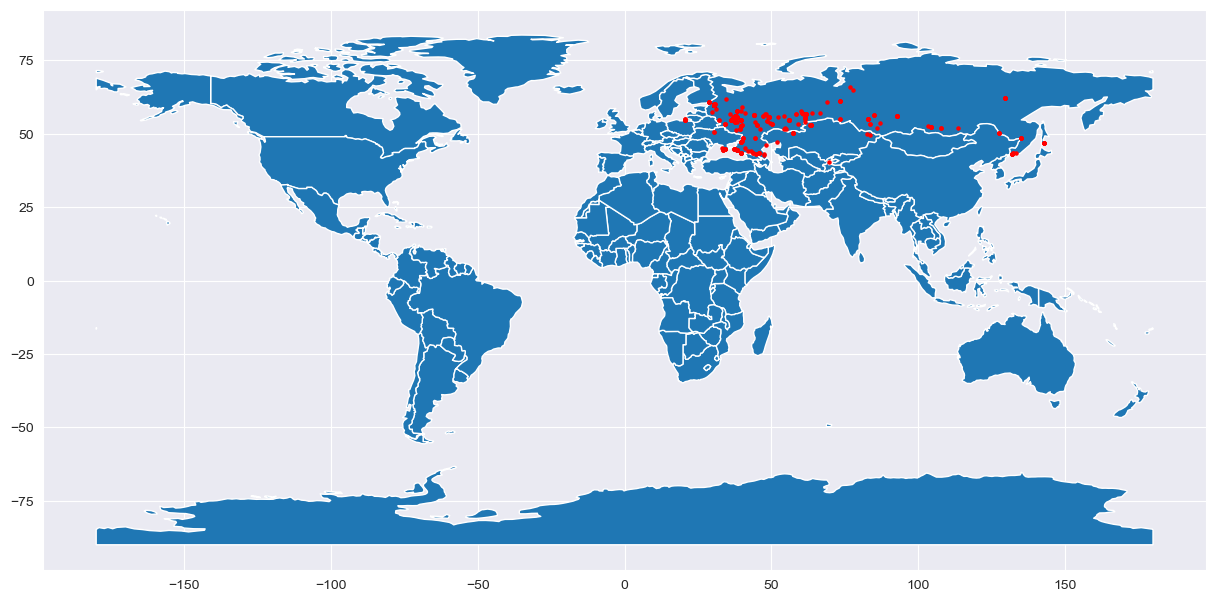

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=5)

plt.show()